In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('D:/workspace/usedcars/data/raw/used_cars_data.csv',header=0, low_memory=False, nrows=100000)
#取10萬筆資料示範
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      100000 non-null  object 
 1   back_legroom             95046 non-null   object 
 2   bed                      607 non-null     object 
 3   bed_height               8123 non-null    object 
 4   bed_length               8123 non-null    object 
 5   body_type                99599 non-null   object 
 6   cabin                    1667 non-null    object 
 7   city                     100000 non-null  object 
 8   city_fuel_economy        83984 non-null   float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             100000 non-null  int64  
 11  dealer_zip               100000 non-null  int64  
 12  description              97457 non-null   object 
 13  engine_cylinders         97002 non-null   object 
 14  engin

In [176]:
#觀察空值>50%的欄位
print(df.isna().sum() / df.shape[0]*100)

vin                      0.000
back_legroom             4.954
bed                     99.393
bed_height              91.877
bed_length              91.877
                         ...  
wheel_system             4.624
wheel_system_display     4.624
wheelbase                4.954
width                    4.954
year                     0.000
Length: 66, dtype: float64


In [177]:
#刪除空值>50%的欄位
df2 = df.dropna(axis=1, thresh=(df.shape[0]/2))

In [178]:
df2.isna().sum() / df.shape[0]*100

vin                      0.000
back_legroom             4.954
body_type                0.401
city                     0.000
city_fuel_economy       16.016
daysonmarket             0.000
dealer_zip               0.000
description              2.543
engine_cylinders         2.998
engine_displacement      5.339
engine_type              2.998
exterior_color           0.000
fleet                   43.075
frame_damaged           43.075
franchise_dealer         0.000
franchise_make          25.416
front_legroom            4.954
fuel_tank_volume         4.954
fuel_type                2.459
has_accidents           43.075
height                   4.954
highway_fuel_economy    16.016
horsepower               5.339
interior_color           0.000
isCab                   43.075
is_new                   0.000
latitude                 0.000
length                   4.954
listed_date              0.000
listing_color            0.000
listing_id               0.000
longitude                0.000
main_pic

In [179]:
#fleet,frame_damaged...空值比例同樣為43.075%，多為事故資料，無法回填，移除這46.2064%的資料
df2.dropna(axis=0,subset=['fleet'],inplace=True)

C:\Users\RickyLuo\AppData\Local\Temp\ipykernel_1268\4026772284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,subset=['fleet'],inplace=True)


In [180]:
df2.isna().sum() / df.shape[0]*100

vin                      0.000
back_legroom             1.933
body_type                0.046
city                     0.000
city_fuel_economy        7.773
daysonmarket             0.000
dealer_zip               0.000
description              0.399
engine_cylinders         1.104
engine_displacement      1.918
engine_type              1.104
exterior_color           0.000
fleet                    0.000
frame_damaged            0.000
franchise_dealer         0.000
franchise_make          25.394
front_legroom            1.933
fuel_tank_volume         1.933
fuel_type                0.939
has_accidents            0.000
height                   1.933
highway_fuel_economy     7.773
horsepower               1.918
interior_color           0.000
isCab                    0.000
is_new                   0.000
latitude                 0.000
length                   1.933
listed_date              0.000
listing_color            0.000
listing_id               0.000
longitude                0.000
main_pic

空值回填

In [181]:
df2['back_legroom'].value_counts()

38.3 in    2065
--         1935
38.6 in    1785
37.2 in    1716
37.4 in    1531
           ... 
28.7 in       1
13 in         1
30.7 in       1
27 in         1
29.6 in       1
Name: back_legroom, Length: 187, dtype: int64

In [182]:
df2['back_legroom'].replace('--',np.nan,inplace=True)
df2['back_legroom'] = df2['back_legroom'].str.split(' ').str[0]
df2['back_legroom'] = df2['back_legroom'].astype(float)
df2['back_legroom']

C:\Users\RickyLuo\AppData\Local\Temp\ipykernel_1268\1373871788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['back_legroom'].replace('--',np.nan,inplace=True)
C:\Users\RickyLuo\AppData\Local\Temp\ipykernel_1268\1373871788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['back_legroom'] = df2['back_legroom'].str.split(' ').str[0]
C:\Users\RickyLuo\AppData\Local\Temp\ipykernel_1268\1373871788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

2        35.4
5        37.1
9        33.8
10        NaN
12       35.1
         ... 
99991    33.7
99992    33.5
99993    36.5
99996    39.4
99997    36.5
Name: back_legroom, Length: 56925, dtype: float64

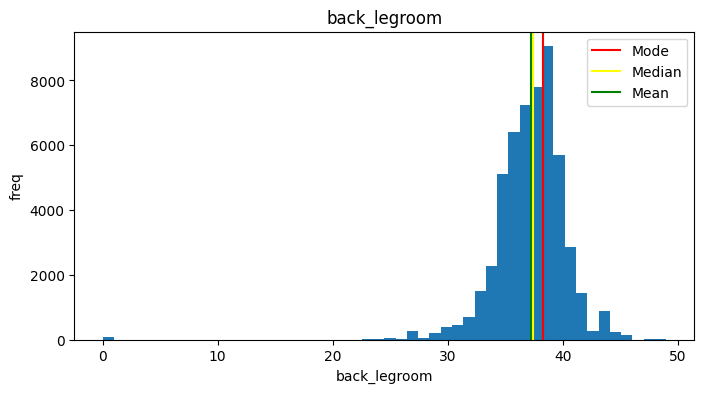

In [183]:
fig = plt.figure(figsize=(8,4))
plt.hist(df2['back_legroom'],bins=50)
plt.title('back_legroom')
plt.xlabel('back_legroom')
plt.ylabel('freq')
plt.axvline(df2['back_legroom'].mode()[0], color='red',label='Mode')
plt.axvline(df2['back_legroom'].median(), color='yellow', label='Median')
plt.axvline(df2['back_legroom'].mean(), color='green', label='Mean')
plt.legend()

plt.show()

In [184]:
df2.loc[:,['body_type','maximum_seating','back_legroom','make_name','model_name']][(df2['back_legroom'] < 10) & (df2['body_type'] != 'Pickup Truck')]

,body_type,maximum_seating,back_legroom,make_name,model_name
14803,SUV / Crossover,4 seats,0.0,Jeep,Wrangler
83095,Sedan,5 seats,3.5,Subaru,Impreza


In [185]:
df2.loc[:,['body_type','maximum_seating','back_legroom','make_name','model_name']][(df2['model_name'] == 'Wrangler')]

,body_type,maximum_seating,back_legroom,make_name,model_name
706,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
3253,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
3582,SUV / Crossover,NaN,NaN,Jeep,Wrangler
3622,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
4096,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
...,...,...,...,...,...
95987,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
96157,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
96458,SUV / Crossover,4 seats,35.6,Jeep,Wrangler
97334,SUV / Crossover,4 seats,35.6,Jeep,Wrangler


In [186]:
df2.loc[[3582,14803],['back_legroom']] = 35.6

In [187]:
df2.loc[:,['body_type','maximum_seating','back_legroom','make_name','model_name']][(df2['model_name'] == 'Impreza')]

,body_type,maximum_seating,back_legroom,make_name,model_name
50,Hatchback,NaN,NaN,Subaru,Impreza
1124,Hatchback,NaN,NaN,Subaru,Impreza
1219,Sedan,5 seats,36.5,Subaru,Impreza
1577,Hatchback,NaN,NaN,Subaru,Impreza
2109,Hatchback,5 seats,35.4,Subaru,Impreza
...,...,...,...,...,...
96791,Sedan,5 seats,35.4,Subaru,Impreza
96971,Hatchback,NaN,NaN,Subaru,Impreza
97263,Sedan,5 seats,35.4,Subaru,Impreza
97668,Hatchback,NaN,NaN,Subaru,Impreza


In [188]:
df2.loc[[83095],['back_legroom']] = 36.5

In [189]:
df2.loc[:,['body_type','maximum_seating','back_legroom','make_name','model_name']][(df2['model_name'] == 'Impreza') & (df2['body_type'] == 'Hatchback')]

,body_type,maximum_seating,back_legroom,make_name,model_name
50,Hatchback,NaN,NaN,Subaru,Impreza
1124,Hatchback,NaN,NaN,Subaru,Impreza
1577,Hatchback,NaN,NaN,Subaru,Impreza
2109,Hatchback,5 seats,35.4,Subaru,Impreza
2772,Hatchback,NaN,NaN,Subaru,Impreza
...,...,...,...,...,...
95973,Hatchback,5 seats,35.4,Subaru,Impreza
96487,Hatchback,5 seats,35.4,Subaru,Impreza
96971,Hatchback,NaN,NaN,Subaru,Impreza
97668,Hatchback,NaN,NaN,Subaru,Impreza


In [190]:
df2.loc[(df2['model_name'] == 'Impreza') & (df2['body_type'] == 'Hatchback'),['back_legroom']]= 35.4
df2.loc[(df2['model_name'] == 'Impreza') & (df2['body_type'] == 'Hatchback'),['maximum_seating']]= '5 seats'

In [191]:
df2.loc[:,['body_type','maximum_seating','back_legroom','make_name','model_name']][(df2['model_name'] == 'Impreza') & (df2['body_type'] == 'Hatchback')]

,body_type,maximum_seating,back_legroom,make_name,model_name
50,Hatchback,5 seats,35.4,Subaru,Impreza
1124,Hatchback,5 seats,35.4,Subaru,Impreza
1577,Hatchback,5 seats,35.4,Subaru,Impreza
2109,Hatchback,5 seats,35.4,Subaru,Impreza
2772,Hatchback,5 seats,35.4,Subaru,Impreza
...,...,...,...,...,...
95973,Hatchback,5 seats,35.4,Subaru,Impreza
96487,Hatchback,5 seats,35.4,Subaru,Impreza
96971,Hatchback,5 seats,35.4,Subaru,Impreza
97668,Hatchback,5 seats,35.4,Subaru,Impreza


In [193]:
#na回填mean
df2['back_legroom'].fillna(df2['back_legroom'].mean(), inplace=True)

C:\Users\RickyLuo\AppData\Local\Temp\ipykernel_1268\3827594467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['back_legroom'].fillna(df2['back_legroom'].mean(), inplace=True)


In [195]:
df2['back_legroom'].isna().sum()

0